In [ ]:
Happiness Index 2018-2019
An analysis of the happiness index for the years 2018 and 2019
DATA SET= https://www.kaggle.com/datasets/sougatapramanick/happiness-index-2018-2019?select=report_2018-2019.csv

In [65]:
import pandas as pd
import hvplot.pandas
from IPython.display import display
import holoviews as hv
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Load the CSV file
file_path = r'C:\Users\T blqck\projects\Happiness Index 2018-2019.csv'
data = pd.read_csv(file_path)

# Preview the columns
print(data.head())

# Display the column names
print(data.columns)


   Overall rank Country or region  Year  Score  GDP per capita  \
0           154       Afghanistan  2019  3.203           0.350   
1           145       Afghanistan  2018  3.632           0.332   
2           107           Albania  2019  4.719           0.947   
3           112           Albania  2018  4.586           0.916   
4            88           Algeria  2019  5.211           1.002   

   Social support  Healthy life expectancy  Freedom to make life choices  \
0           0.517                    0.361                         0.000   
1           0.537                    0.255                         0.085   
2           0.848                    0.874                         0.383   
3           0.817                    0.790                         0.419   
4           1.160                    0.785                         0.086   

   Generosity  Perceptions of corruption  
0       0.158                      0.025  
1       0.191                      0.036  
2       0.178    

In [19]:
# Filter the data for the year 2018
data_2018 = data[data['Year'] == 2018]

# Filter the data for the year 2019
data_2019 = data[data['Year'] == 2019]

# Create scatter plots for both years
scatter_2018 = data_2018.hvplot.scatter(x='GDP per capita', y='Score', color='blue', label='2018')
scatter_2019 = data_2019.hvplot.scatter(x='GDP per capita', y='Score', color='red', label='2019')

# Combine the scatter plots into a single visualization
combined_plot = scatter_2018 * scatter_2019

# Display the visualization
display(combined_plot)

:Overlay
   .Scatter.A_2018 :Scatter   [GDP per capita]   (Score)
   .Scatter.A_2019 :Scatter   [GDP per capita]   (Score)

In [ ]:
The correlation between Happiness Score and GDP per capita remained strong in both 2018 (0.802) and 2019 (0.794).
Despite a decrease in happiness,the scatter plot visualization depicts a consistent positive relationship.

In [ ]:
To gain deeper insights into the decline in happiness, we delve into the average changes in each variable, shedding light on the factors contributing to the drop in the happiness index for 2019. 
By analyzing key aspects such as social support, freedom to make life choices, and perceptions of corruption, we aim to uncover the underlying dynamics behind the decrease in happiness.
Through this exploration, we unravel the intricate tapestry of influences shaping our well-being, providing a captivating narrative of the complexities surrounding the observed decline in happiness.

In [32]:

# Calculate the average changes in each variable
changes = {
    'Variable': ['Social support', 'Healthy life expectancy', 'Freedom to make life choices',
                 'Generosity', 'Perceptions of corruption'],
    'Change': [
        data_2019['Social support'].mean() - data_2018['Social support'].mean(),
        data_2019['Healthy life expectancy'].mean() - data_2018['Healthy life expectancy'].mean(),
        data_2019['Freedom to make life choices'].mean() - data_2018['Freedom to make life choices'].mean(),
        data_2019['Generosity'].mean() - data_2018['Generosity'].mean(),
        data_2019['Perceptions of corruption'].mean() - data_2018['Perceptions of corruption'].mean()
    ]
}

# Create a pandas DataFrame
df_changes = pd.DataFrame(changes)






# Create a bar plot
bar_plot = df_changes.hvplot.bar(
    x='Variable',
    y='Change',
    xlabel='Variable',
    ylabel='Average Change',
    title='Average Changes in Variables: 2018 to 2019',
    color='steelblue',
    ylim=(-0.1, 0.1),
    height=400,
    rot=45
)

# Display the visualization
display(bar_plot)

# Create a pandas DataFrame
df_changes = pd.DataFrame(changes)

# Create a line plot
line_plot = df_changes.hvplot.line(
    x='Variable',
    y='Change',
    xlabel='Variable',
    ylabel='Average Change',
    title='Average Changes in Variables: 2018 to 2019',
    color='steelblue',
    ylim=(-0.1, 0.1),
    height=400,
    legend=False
)

# Set the x-axis rotation for the toolbar
line_plot.opts(toolbar='above', xrotation=45)

# Display the visualization
display(line_plot)



# Create a pandas DataFrame
df_changes = pd.DataFrame(changes)

# Create an area plot
area_plot = df_changes.hvplot.area(
    x='Variable',
    y='Change',
    xlabel='Variable',
    ylabel='Average Change',
    title='Average Changes in Variables: 2018 to 2019',
    color='steelblue',
    height=400,
    legend='top_right',
    xticks=range(len(df_changes))
)

# Set the x-axis rotation for the toolbar
area_plot.opts(toolbar='above', xrotation=45)

# Display the visualization
display(area_plot)

:Bars   [Variable]   (Change)

:Curve   [Variable]   (Change)

:Area   [Variable]   (Change)

In [ ]:
Overall, the results suggest that while there was a decrease in social support, freedom to make life choices, and slight negative changes in perceptions of corruption, the significant improvement in healthy life expectancy and minor increase in generosity might have counteracted some of the negative effects. 
It's important to consider these factors collectively to understand the overall impact on happiness and the potential reasons for the drop observed in the happiness score.

In [ ]:
Now lets try to identify the top countries based on GDP in 2019 and calculate the correlation between their Happiness Score and GDP per capita for both 2018 and 2019. 
We will filter the dataset for the respective years, sorts the data based on GDP per capita, selects the top countries, and then calculates the correlation using the filtered data. 
The intent is to analyze the relationship between GDP and Happiness Score for the top countries and determine if there are any changes in the correlation between the two variables from 2018 to 2019.

In [36]:
# Filter the data for the years 2018 and 2019
data_2018 = data[data['Year'] == 2018]
data_2019 = data[data['Year'] == 2019]

# Sort the data for 2019 by GDP per capita in descending order
sorted_data_2019 = data_2019.sort_values('GDP per capita', ascending=False)

# Select the top countries based on GDP for 2019
top_countries_2019 = sorted_data_2019['Country or region'].head(5).tolist()

# Filter the data for the selected countries in 2018 and 2019
filtered_data_2018 = data_2018[data_2018['Country or region'].isin(top_countries_2019)]
filtered_data_2019 = data_2019[data_2019['Country or region'].isin(top_countries_2019)]

# Calculate the correlation between Happiness Score and GDP per capita for 2018 and 2019
correlation_2018 = filtered_data_2018['Score'].corr(filtered_data_2018['GDP per capita'])
correlation_2019 = filtered_data_2019['Score'].corr(filtered_data_2019['GDP per capita'])

print(f"Top countries based on GDP in 2019: {top_countries_2019}")
print(f"Correlation between Happiness Score and GDP per capita for 2018: {correlation_2018}")
print(f"Correlation between Happiness Score and GDP per capita for 2019: {correlation_2019}")


Top countries based on GDP in 2019: ['Qatar', 'Luxembourg', 'Singapore', 'United Arab Emirates', 'Kuwait']
Correlation between Happiness Score and GDP per capita for 2018: 0.547053174202002
Correlation between Happiness Score and GDP per capita for 2019: 0.14660155450118445


In [ ]:
In 2018, there is a relatively stronger positive correlation (0.547) between the Happiness Score and GDP per capita, indicating a moderate positive relationship between the two variables. However, in 2019, the correlation decreases to 0.147, suggesting a weaker positive relationship or a decrease in the strength of the association between the Happiness Score and GDP per capita.

Therefore, based on the provided correlation values, we can infer that the correlation between the Happiness Score and GDP per capita has reduced from 2018 to 2019. This suggests a potential change or shift in the relationship between economic prosperity (GDP per capita) and happiness (Happiness Score) for the top countries during this period.

Let's understand the sitution better with the help of a Bar Plot:

In [46]:
# Filter the data for the years 2018 and 2019
data_2018 = data[data['Year'] == 2018]
data_2019 = data[data['Year'] == 2019]

# Sort the data for 2019 by GDP per capita in descending order
sorted_data_2019 = data_2019.sort_values('GDP per capita', ascending=False)

# Select the top countries based on GDP for 2019
top_countries_2019 = sorted_data_2019['Country or region'].head(5).tolist()

# Filter the data for the selected countries in 2018 and 2019
filtered_data_2018 = data_2018[data_2018['Country or region'].isin(top_countries_2019)]
filtered_data_2019 = data_2019[data_2019['Country or region'].isin(top_countries_2019)]

# Combine the data for 2018 and 2019
combined_data = pd.concat([filtered_data_2018, filtered_data_2019])

# Create a bar plot for 2018 and 2019 combined
bar_combined = combined_data.hvplot.bar(
    x='Country or region',
    y='Score',
    by='Year',
    xlabel='Country',
    ylabel='Happiness Score',
    title='Happiness Score by Country: 2018 vs 2019',
    height=600,
    legend='top_right',
    rot=80
)

# Display the visualization
display(bar_combined)

:Bars   [Country or region,Year]   (Score)

In [ ]:
LETS SEE THE AVERAGE CHANGES IN EACH VARIABLE OF THES FIVE COUNTRIES.

In [74]:
# Filter the data for the top countries based on GDP in 2019
top_countries_gdp_2019 = ['Qatar', 'Luxembourg', 'Singapore', 'United Arab Emirates', 'Kuwait']
filtered_data_gdp_2019 = data_2019[data_2019['Country or region'].isin(top_countries_gdp_2019)]

# Select the relevant columns for analysis
columns_to_check = ['Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Calculate the changes in the selected columns between 2018 and 2019
changes = []
for country in top_countries_gdp_2019:
    data_2018_country = data_2018[data_2018['Country or region'] == country]
    data_2019_country = filtered_data_gdp_2019[filtered_data_gdp_2019['Country or region'] == country]
    
    change = {}
    change['Country'] = country
    for column in columns_to_check:
        change[column] = data_2019_country[column].values[0] - data_2018_country[column].values[0]
    
    changes.append(change)

# Create a pandas DataFrame
df_changes = pd.DataFrame(changes)

# Create a bar plot to visualize the changes in the selected factors
bar_plot = df_changes.hvplot.bar(
    x='Country',
    y=columns_to_check,
    xlabel='Country',
    ylabel='Change',
    title='Changes in Factors: Top Countries based on GDP (2018 to 2019)',
    height=400,
    legend='top_right',
    rot=45
)

# Display the visualization
display(bar_plot)






:Bars   [Country,Variable]   (value)

In [ ]:
The above visual shows the level of changes in factor in the top 5 coutries withthe best GDP.

we would go ahead to create a heat map that shows how this factors affect the hapiness score. 

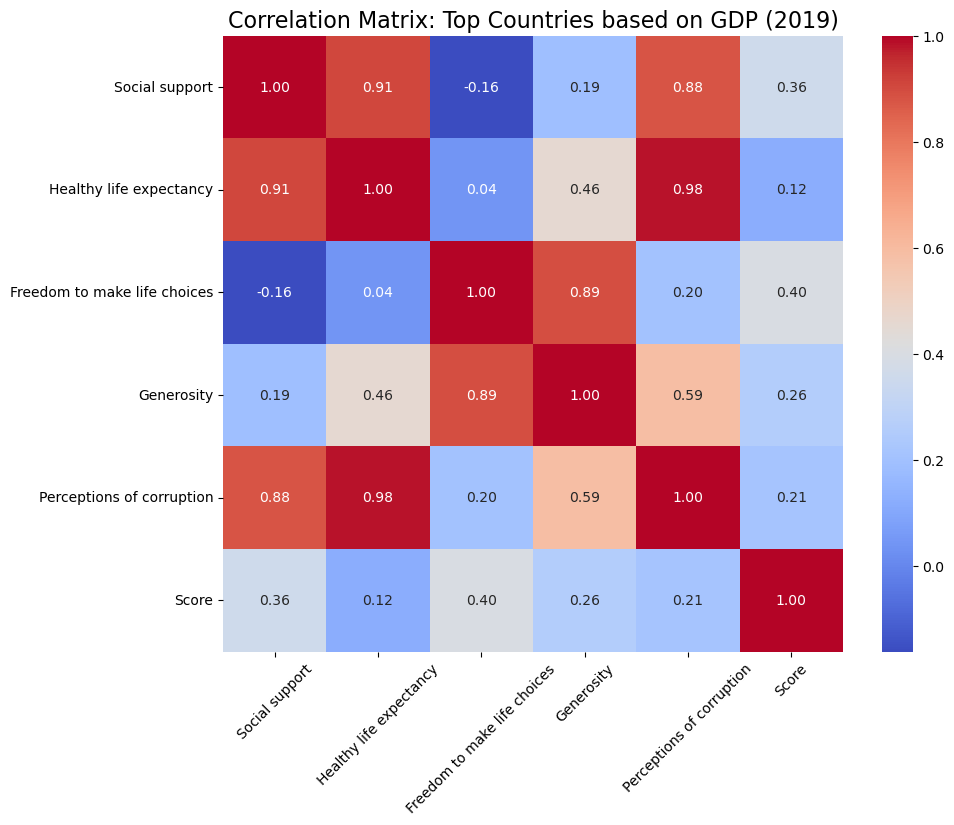

In [66]:


# Filter the data for the top countries based on GDP in 2019
top_countries_gdp_2019 = ['Qatar', 'Luxembourg', 'Singapore', 'United Arab Emirates', 'Kuwait']
filtered_data_gdp_2019 = data_2019[data_2019['Country or region'].isin(top_countries_gdp_2019)]

# Select the relevant columns for correlation analysis
columns_to_correlate = ['Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Calculate the correlation matrix
correlation_matrix = filtered_data_gdp_2019[columns_to_correlate + ['Score']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Top Countries based on GDP (2019)', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


In [ ]:
Now let's try seeing the 5 top countries with the highest happiness score in relation to their GDP

In [49]:
# Filter the data for the years 2018 and 2019
data_2018 = data[data['Year'] == 2018]
data_2019 = data[data['Year'] == 2019]

# Sort the data for 2018 by the Happiness Score in descending order
sorted_data_2018 = data_2018.sort_values('Score', ascending=False)

# Select the top countries based on the Happiness Score for 2018
top_countries_2018 = sorted_data_2018['Country or region'].head(5).tolist()

# Filter the data for the selected countries in 2018 and 2019
filtered_data_2018 = data_2018[data_2018['Country or region'].isin(top_countries_2018)]
filtered_data_2019 = data_2019[data_2019['Country or region'].isin(top_countries_2018)]

# Calculate the correlation of GDP per capita for the top countries in 2018 and 2019
correlation_2018 = filtered_data_2018['Score'].corr(filtered_data_2018['GDP per capita'])
correlation_2019 = filtered_data_2019['Score'].corr(filtered_data_2019['GDP per capita'])

# Print the list of top countries and their correlations
print("Top Countries based on Happiness Score:")
print(top_countries_2018)
print("\nCorrelation of GDP per capita for 2018: ", correlation_2018)
print("Correlation of GDP per capita for 2019: ", correlation_2019)


Top Countries based on Happiness Score:
['Finland', 'Norway', 'Denmark', 'Iceland', 'Switzerland']

Correlation of GDP per capita for 2018:  -0.21942249104352854
Correlation of GDP per capita for 2019:  -0.6243851164974368


In [ ]:
The code helps identify the top countries with the highest Happiness Scores in 2018, and then it calculates and compares the correlation between the GDP per capita and the Happiness Score for those countries in both 2018 and 2019.
This analysis provides insights into the relationship between economic factors (GDP per capita) and happiness levels (Happiness Score) for the top-performing countries.


let's visualize this to get a better uderstanding.

In [50]:
# Filter the data for the years 2018 and 2019
data_2018 = data[data['Year'] == 2018]
data_2019 = data[data['Year'] == 2019]

# Sort the data for 2018 by the Happiness Score in descending order
sorted_data_2018 = data_2018.sort_values('Score', ascending=False)

# Select the top countries based on the Happiness Score for 2018
top_countries_2018 = sorted_data_2018['Country or region'].head(5).tolist()

# Filter the data for the selected countries in 2018 and 2019
filtered_data_2018 = data_2018[data_2018['Country or region'].isin(top_countries_2018)]
filtered_data_2019 = data_2019[data_2019['Country or region'].isin(top_countries_2018)]

# Combine the data for 2018 and 2019
combined_data = pd.concat([filtered_data_2018, filtered_data_2019])

# Create a bar plot for 2018 and 2019 combined
bar_combined = combined_data.hvplot.bar(
    x='Country or region',
    y='GDP per capita',
    by='Year',
    xlabel='Country',
    ylabel='GDP per capita',
    title='GDP per capita by Country: 2018 vs 2019',
    height=400,
    legend='top_right',
    rot=45
)

# Display the visualization
display(bar_combined)

:Bars   [Country or region,Year]   (GDP per capita)

In [ ]:
lets see the average changes in each variable of these five countries

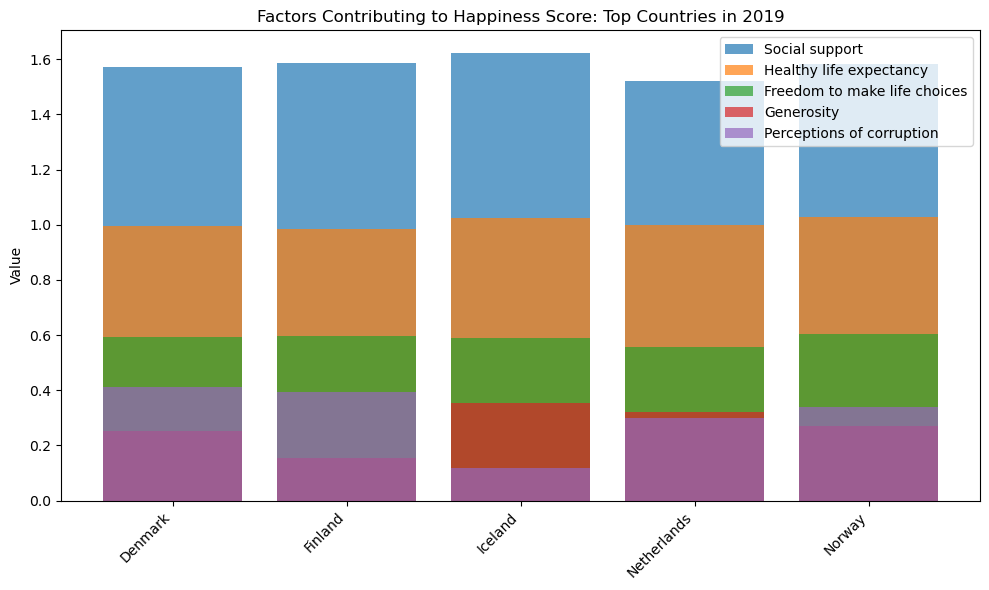

:Bars   [Country or region,Variable]   (value)

In [69]:


# Set the figure size
plt.figure(figsize=(10, 6))

# Set the x-axis values and position
x = analysis_data['Country or region']
x_pos = range(len(x))

# Plot the bars for each factor
for i, factor in enumerate(factors):
    plt.bar(x_pos, analysis_data[factor], alpha=0.7, label=factor)

# Set the x-axis labels and rotate them for better readability
plt.xticks(x_pos, x, rotation=45, ha='right')

# Set the y-axis label and title
plt.ylabel('Value')
plt.title('Factors Contributing to Happiness Score: Top Countries in 2019')

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()



# Create a bar plot to visualize the changes in the selected factors
bar_plot = analysis_data.hvplot.bar(
    x='Country or region',
    y=factors,
    xlabel='Country',
    ylabel='Change',
    title='Changes in Factors: Top Countries based on Score in 2019',
    height=400,
    legend='top_right',
    rot=45
)

# Display the visualization
display(bar_plot)



In [ ]:
In summary, the analysis reveals that there is a negative relationship between GDP per capita and Happiness Score for the top countries in both 2018 and 2019. 
However, the correlation is weaker in 2018 compared to 2019, indicating a stronger association between economic factors (GDP per capita) and lower happiness levels (Happiness Score) in 2019. 
It suggests that factors other than GDP per capita might have played a more significant role in determining the happiness levels of these countries in 2018.

In [ ]:
Let's visualize the relationship between GDP and Happiness Score for the top 5 countries based on GDP and the top 5 countries with the highest Happiness Score, we can create a combined scatter plot.
This visualization will provide insights into how GDP per capita and Happiness Score are related for these selected countries.

In [59]:
# Filter the data for the years 2018 and 2019
data_2018 = data[data['Year'] == 2018]
data_2019 = data[data['Year'] == 2019]

# Sort the data for 2019 by GDP per capita in descending order
sorted_data_2019 = data_2019.sort_values('GDP per capita', ascending=False)

# Select the top 5 countries based on GDP for 2019
top_countries_gdp_2019 = sorted_data_2019['Country or region'].head(5).tolist()

# Filter the data for the selected countries in 2018 and 2019
filtered_data_gdp_2018 = data_2018[data_2018['Country or region'].isin(top_countries_gdp_2019)]
filtered_data_gdp_2019 = data_2019[data_2019['Country or region'].isin(top_countries_gdp_2019)]

# Sort the data for 2018 by the Happiness Score in descending order
sorted_data_2018 = data_2018.sort_values('Score', ascending=False)

# Select the top 5 countries based on the Happiness Score for 2018
top_countries_score_2018 = sorted_data_2018['Country or region'].head(5).tolist()

# Filter the data for the selected countries in 2018 and 2019
filtered_data_score_2018 = data_2018[data_2018['Country or region'].isin(top_countries_score_2018)]
filtered_data_score_2019 = data_2019[data_2019['Country or region'].isin(top_countries_score_2018)]

# Combine the data for GDP and Happiness Score
combined_data_gdp = pd.concat([filtered_data_gdp_2018, filtered_data_gdp_2019])
combined_data_score = pd.concat([filtered_data_score_2018, filtered_data_score_2019])

# Create scatter plots for the top 5 countries based on GDP and the top 5 countries with the highest Happiness Score
scatter_plot_gdp = combined_data_gdp.hvplot.scatter(
    x='Score',
    y='GDP per capita',
    color='blue',
    marker='o',
    size=10,
    alpha=0.7,
    title='Relationship between GDP per capita and Happiness Score',
    xlabel='Happiness Score',
    ylabel='GDP per capita',
    xlim=(0, None),
    ylim=(0, None),
    label='Top 5 GDP Countries'
)

scatter_plot_score = combined_data_score.hvplot.scatter(
    x='GDP per capita',
    y='Score',
    color='red',
    marker='s',
    size=10,
    alpha=0.7,
    title='Relationship between Happiness Score and GDP per capita',
    xlabel='GDP per capita',
    ylabel='Happiness Score',
    xlim=(0, None),
    ylim=(0, None),
    label='Top 5 Happiness Score Countries'
)

# Combine the scatter plots into one visualization
combined_plot = (scatter_plot_gdp * scatter_plot_score).opts(
    hv.opts.Scatter(height=500, width=800, tools=['hover'], show_grid=True, legend_position='top_right')
)

# Display the visualization
display(combined_plot)

:Overlay
   .Scatter.Top_5_GDP_Countries             :Scatter   [Score]   (GDP per capita)
   .Scatter.Top_5_Happiness_Score_Countries :Scatter   [GDP per capita]   (Score)

In [ ]:
Based on these findings, we can conclude that economic prosperity, as measured by GDP per capita, does not necessarily guarantee higher levels of happiness. 
Other factors beyond economic indicators, such as social support, life expectancy, freedom, and perceptions of corruption, may play significant roles in determining overall happiness.
